In [2]:
# execute cell no 1 nad 2 only if your running the notebook on google colab
# to install external libraries required for the project
# (optional) restart run time only after running first 2 cells
# for more info --https://stackoverflow.com/questions/54613992/how-to-install-and-use-basemap-on-google-colab

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
     - 133.1 MB 4.6 MB/s
     |████████████████████████████████| 6.6 MB 7.7 MB/s 
     |████████████████████████████████| 219 kB 54.8 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759603 sha256=41f968c714fec9738572786ff5db2e2046f68d38cfb97e1fb991e44a821103d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-05ekt8rd/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any

In [3]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8 MB 8.4 MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp37-cp37m-linux_x86_64.whl size=3702478 sha256=49e3b2d6b3e2e2417a94d10f039ba4487f42f7d8fa192aef5cc5d3e9f0656894
  Stored in directory: /root/.cache/pip/wheels/08/60/55/38382877bab48a6abfca7bd66115e287ce5a9530cbce631771
Successfully built pyproj
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.1.0
    Uninstalling pyproj-3.1.0:
      Successfully uninstalled pyproj-3.1.0


In [4]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# external libraries
from mpl_toolkits.basemap import Basemap

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# setting options for output formatting
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

# 1. Reading the data

In [7]:
# reading csv file into dataframe
terror = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Global Terrorism Analysis - Abdul Wadood/Copy of Global Terrorism Data.csv', encoding='latin1', low_memory=False)

# 2. Basic Exploration

In [8]:
# retrieving shape
terror.shape

(181691, 135)

In [9]:
#information of dataframe
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [10]:
#brief description of dataframe
terror.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [13]:
#first 5 rows
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [14]:
#last 5 rows
terror.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Shabaab,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,10.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muslim extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangsamoro Islamic Freedom Movement (BIFM),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0

# 3.Data Cleaning

In [15]:
# creating a new dataframe with only those columns which are having null values less than 30%
row_count,col_count = terror.shape
columns = list(terror.columns)
df = pd.DataFrame(columns = [])
for i in range(col_count):
    null_count = terror.isnull().sum()[i]*100/row_count
    #print(f'{columns[i]} has {int(null_count)}% of missing values')
    if null_count < 30:
        df[columns[i]] = terror[columns[i]]

In [16]:
df.shape

(181691, 48)

In [17]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'gname', 'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt', 'weapsubtype1',
       'weapsubtype1_txt', 'nkill', 'nwound', 'property', 'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [18]:
# renaming the columns with meaningful variables
df.columns = ['event_id', 'Year', 'Month', 'Day', 'extended', 'country_id',
       'Country', 'region_id', 'Region', 'provstate', 'City', 'Latitude',
       'Longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'Multiple', 'Success', 'Suicide', 'attacktype1',
       'attack_type', 'targtype1', 'targt_type', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'Nationolity',
       'Group', 'guncertain1', 'Individual', 'weaptype1', 'weapon_type',
       'weapsubtype1', 'weapsubtype1_txt', 'Deaths','Wounds', 'Property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']

In [19]:
# selecting the columns which are significant for our EDA
df = df[['event_id','Year', 'Month', 'Day', 'extended', 'Country', 'Region',
         'City', 'Latitude', 'Longitude', 'Multiple', 'Success',
         'Suicide', 'attack_type', 'targt_type', 'Nationolity', 'Group',
         'Individual', 'weapon_type', 'Deaths','Wounds']]

In [20]:
df.shape

(181691, 21)

In [21]:
df.head()

,event_id,Year,Month,Day,extended,Country,Region,City,Latitude,Longitude,Multiple,Success,Suicide,attack_type,targt_type,Nationolity,Group,Individual,weapon_type,Deaths,Wounds
0,197000000001,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,0.0,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,0,Unknown,1.0,0.0
1,197000000002,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,0,Unknown,0.0,0.0
2,197001000001,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,0.0,1,0,Assassination,Journalists & Media,United States,Unknown,0,Unknown,1.0,0.0
3,197001000002,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,0.0,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,0,Explosives,NaN,NaN
4,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,0.0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,0,Incendiary,NaN,NaN


In [22]:
#datatypes of final variables
df.dtypes

event_id         int64
Year             int64
Month            int64
Day              int64
extended         int64
Country         object
Region          object
City            object
Latitude       float64
Longitude      float64
Multiple       float64
Success          int64
Suicide          int64
attack_type     object
targt_type      object
Nationolity     object
Group           object
Individual       int64
weapon_type     object
Deaths         float64
Wounds         float64
dtype: object

#**4.Analyzing and visualizing the data**

###4.1 No of attacks in each year

In [23]:
#No.of attacks per year in descending order
print('Years that have highest number of attacks')
df.groupby('Year')['event_id'].count().reset_index().sort_values(by='event_id',ascending=False)[:10]

Years that have highest number of attacks


,Year,event_id
43,2014,16903
44,2015,14965
45,2016,13587
42,2013,12036
46,2017,10900
41,2012,8522
40,2011,5076
22,1992,5071
39,2010,4826
37,2008,4805


###4.2 No of attacks by country

In [24]:
#Countries that were oftenly attacked
print('Countries that were attacked the most')
df.groupby('Country')['event_id'].count().reset_index().sort_values(by='event_id',ascending=False)[:10]

Countries that were attacked the most


,Country,event_id
84,Iraq,24636
134,Pakistan,14368
0,Afghanistan,12731
80,India,11960
35,Colombia,8306
140,Philippines,6908
139,Peru,6096
52,El Salvador,5320
188,United Kingdom,5235
183,Turkey,4292


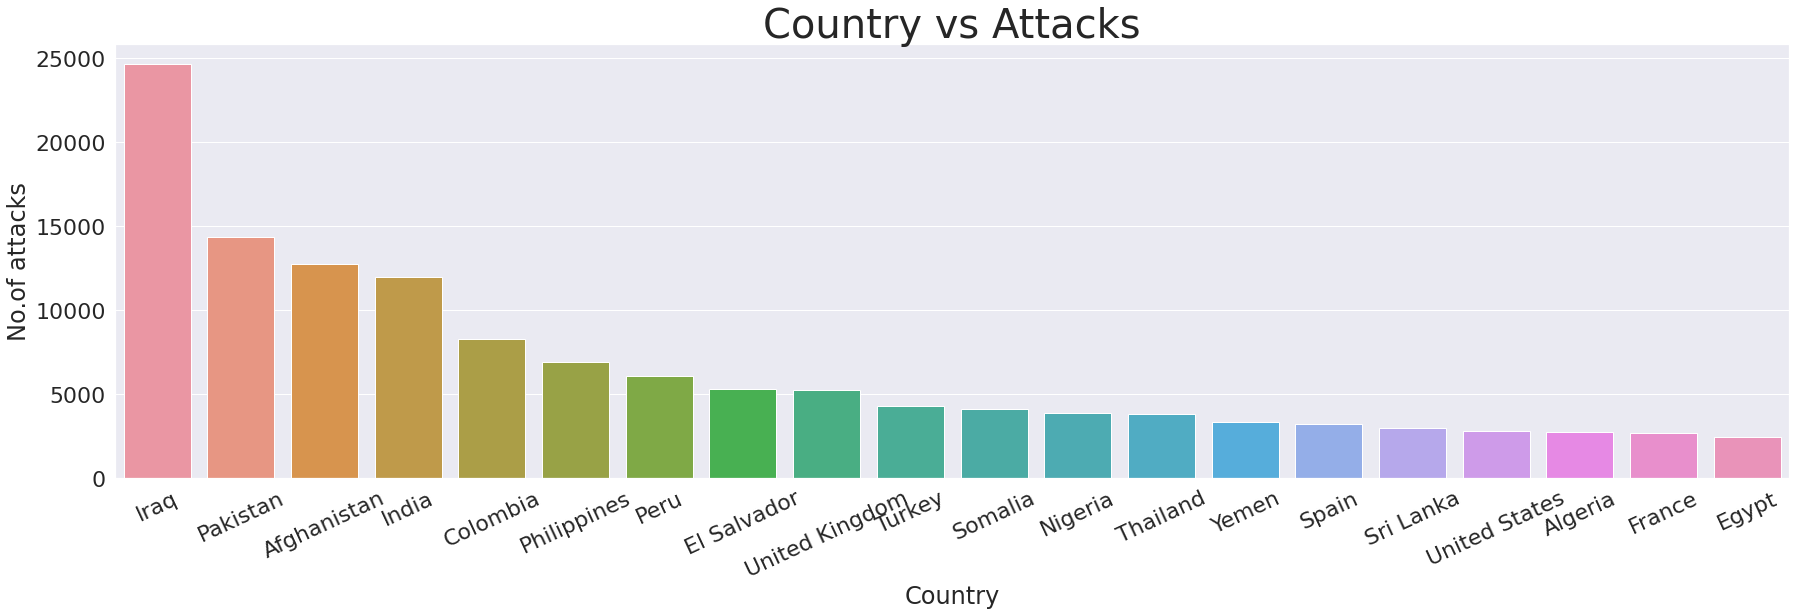

In [25]:
#plotting the top 20 countries which are attacked the most
sns.set(font_scale = 2)
plt.figure(figsize=(30, 8))
temp = df.groupby('Country')['event_id'].count().reset_index().sort_values(by='event_id',ascending=False)[:20]
temp.rename(columns = {'event_id':'No.of attacks'},inplace=True)
sns.barplot(x='Country',y='No.of attacks',data = temp)
plt.title('Country vs Attacks',fontsize=40)
plt.xticks(rotation=25)
plt.show()

###4.3 success rate of attacks across years

In [62]:
#No.of successful attacks per year in descending orderS
df_success = df.groupby(by=('Country'))['Success'].sum().reset_index().sort_values(by='Success',ascending=False)

In [63]:
#No.of attacks per year in descending order
df_attacks = df.groupby('Country')['event_id'].count().reset_index().sort_values(by='event_id',ascending=False)

In [73]:
df_success_rate = pd.merge(df_success,df_attacks,on = 'Country', how = 'outer')
df_success_rate['Success_rate'] = (df_success_rate['Success']/df_success_rate['event_id'])*100
df_success_rate = df_success_rate.sort_values('Success_rate', ascending = False)
df_success_rate.columns = ['Country','Successful_attacks', 'total_attacks', 'Success_rate']
df_success_rate = df_success_rate[df_success_rate['total_attacks']>100]
df_success_rate = df_success_rate.sort_values(by='Success_rate')

In [74]:
# countries with least success rate of attacks
df_success_rate.head(10)

,Country,Successful_attacks,total_attacks,Success_rate
73,Ireland,139,307,45.276873
92,Jordan,84,113,74.336283
88,Austria,88,115,76.521739
29,Israel,1683,2183,77.095740
34,Nepal,956,1215,78.683128
28,West Bank and Gaza Strip,1766,2227,79.299506
8,United Kingdom,4206,5235,80.343840
87,Switzerland,90,111,81.081081
22,Egypt,2011,2479,81.121420
75,Belgium,125,154,81.168831


###4.4 Different types of attacks across years

In [32]:
# grouping the data with diff types of attacks 
attacks_count = df.groupby('attack_type')['event_id'].count().reset_index().rename(columns = {'event_id':'number_of_attacks'})
attacks_count

,attack_type,number_of_attacks
0,Armed Assault,42669
1,Assassination,19312
2,Bombing/Explosion,88255
3,Facility/Infrastructure Attack,10356
4,Hijacking,659
5,Hostage Taking (Barricade Incident),991
6,Hostage Taking (Kidnapping),11158
7,Unarmed Assault,1015
8,Unknown,7276


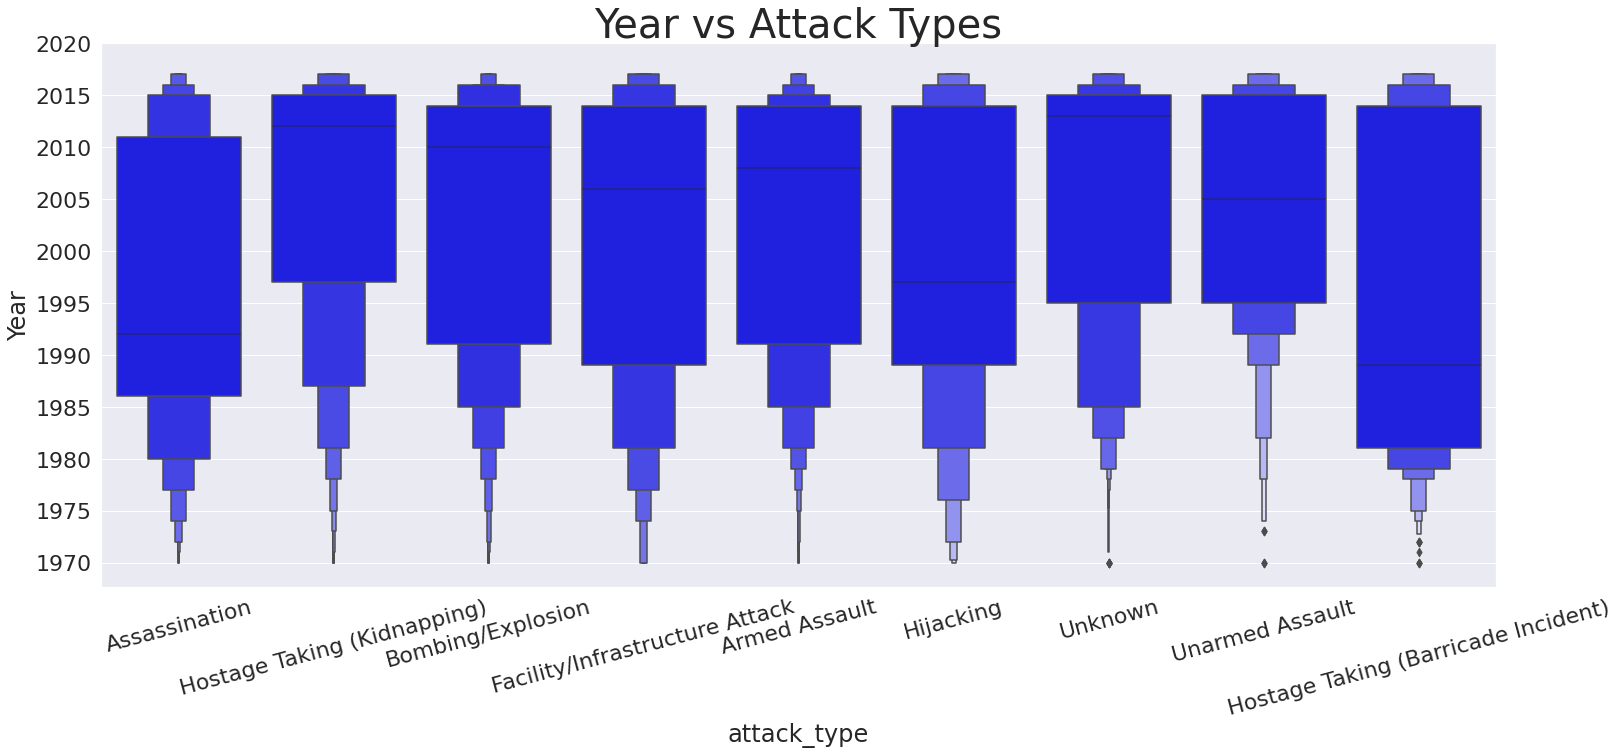

In [33]:
#visualizing the attack types that are more often with respect the period of time
sns.set(font_scale = 2)
plt.figure(figsize=(25, 10))
temp = sns.boxenplot(x="attack_type", y="Year",color="blue", data=df)
temp.set_yticks(range(1970,2021,5))
plt.title('Year vs Attack Types',fontsize=40)
plt.xticks(rotation=15)
plt.show()

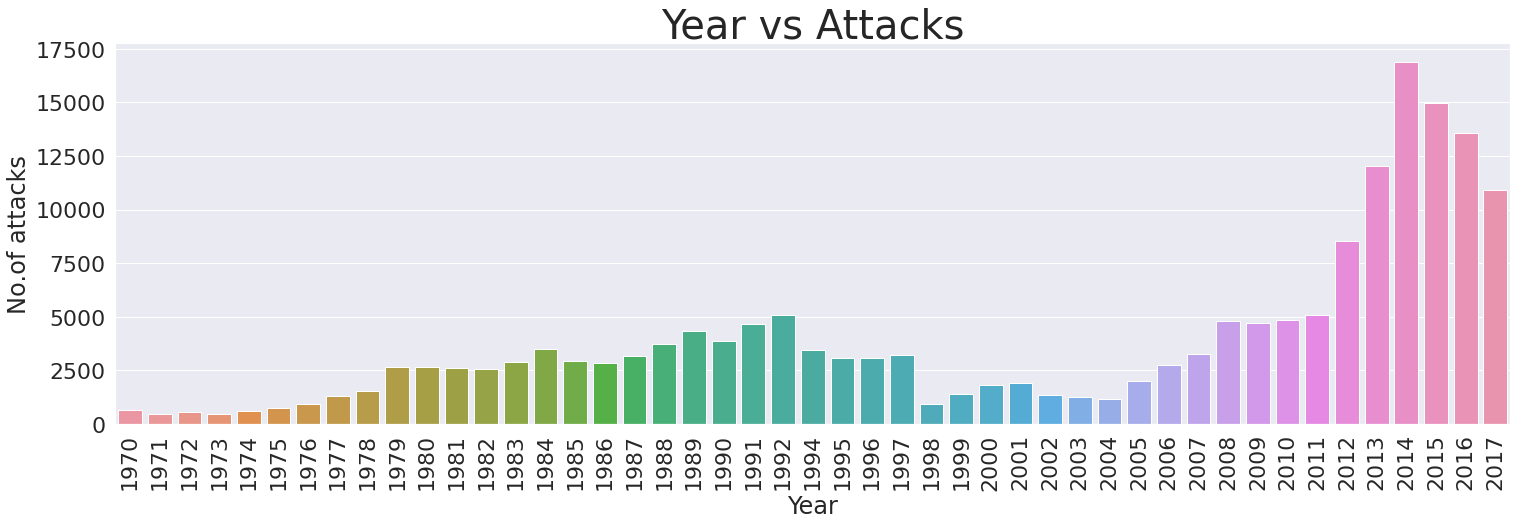

In [34]:
# Plotting no.of attacks vs years(4.1)
sns.set(font_scale = 2)
plt.figure(figsize=(25, 7))
temp = df.groupby('Year')['event_id'].count().reset_index()
temp.rename(columns = {'event_id':'No.of attacks'},inplace=True)
sns.barplot(x='Year',y='No.of attacks',data = temp)
plt.title('Year vs Attacks',fontsize=40)
plt.xticks(rotation=90)
plt.show()

<b>Observation: A sudden spike in the no: of attacks after 2004.<b>

#**5. Further exploring the reason behind the spike**

###5.1 Analysing pre and post 2004 data

In [35]:
# getting countries and their no of attacks, which recorded most no of attacks pre 2004
before = df[df['Year']<=2004]
before.index = np.arange(1, len(before) + 1)
before.groupby('Country')['event_id'].count().reset_index().sort_values(by='event_id',ascending=False)[:10]

,Country,event_id
34,Colombia,6832
138,Peru,6035
51,El Salvador,5320
185,United Kingdom,4378
79,India,3944
163,Spain,3112
180,Turkey,2594
186,United States,2509
59,France,2375
139,Philippines,2357


In [36]:
# getting countries and their no of attacks, which recorded most no of attacks post 2004
after = df[df['Year']>2004]
after.index = np.arange(1, len(after) + 1)
after.groupby('Country')['event_id'].count().reset_index().sort_values(by='event_id',ascending=False)[:10]

,Country,event_id
65,Iraq,24031
0,Afghanistan,12353
105,Pakistan,12307
62,India,8016
110,Philippines,4551
124,Somalia,3954
103,Nigeria,3794
138,Thailand,3543
155,Yemen,3209
83,Libya,2235


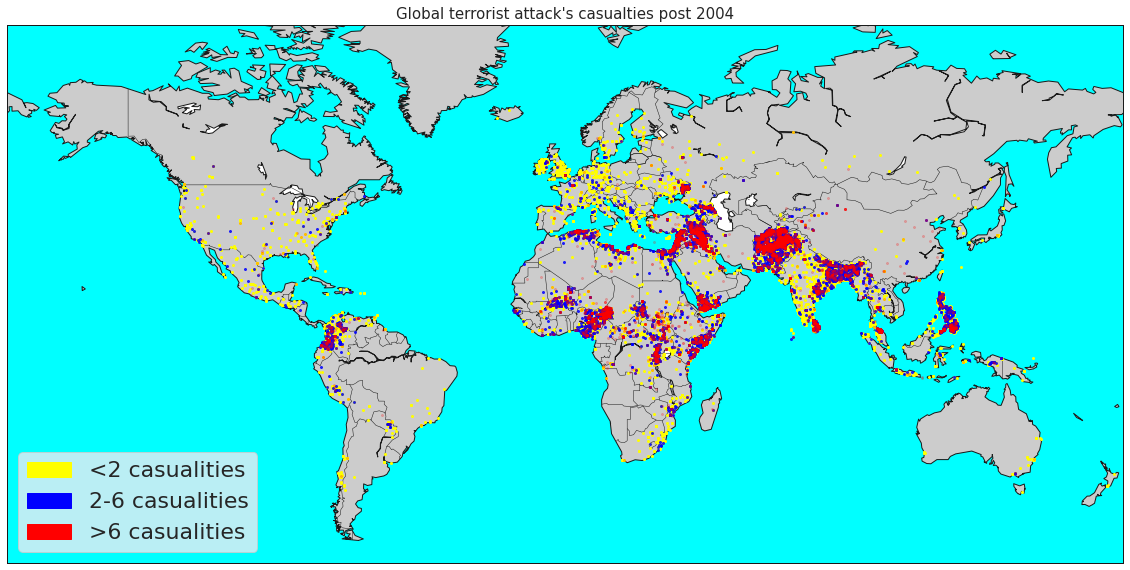

In [37]:
# plotting casualties across countries post 2004 on world map, using Basemap

pd.options.mode.chained_assignment = None
after['casualities'] = after['Wounds'] + after['Deaths']
global_map = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)

lat_=list(after[after['casualities']<=2].Latitude)
long_=list(after[after['casualities']<=2].Longitude)
x_,y_=global_map(long_,lat_)
global_map.plot(x_, y_,'go',markersize=2,color = 'yellow',alpha=1)

lat_=list(after[(after['casualities']>2) & (after['casualities']<=6)].Latitude)
long_=list(after[(after['casualities']>2) & (after['casualities']<=6)].Longitude)
x_,y_=global_map(long_,lat_)
global_map.plot(x_, y_,'go',markersize=2,color = 'blue',alpha=0.8)

lat_=list(after[after['casualities']>6].Latitude)
long_=list(after[after['casualities']>6].Longitude)
x_,y_=global_map(long_,lat_)
global_map.plot(x_, y_,'go',markersize=2,color = 'red',alpha=0.2)

global_map.drawcoastlines()
global_map.drawcountries()
global_map.fillcontinents(lake_color='white')
global_map.drawmapboundary(fill_color='#00ffff')
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.title("Global terrorist attack's casualties post 2004",fontsize = 15)

plt.legend(loc='lower left',handles=[mpatches.Patch(color='yellow',label='<2 casualities'),mpatches.Patch(color='blue',label='2-6 casualities'),mpatches.Patch(color='red',label='>6 casualities')])

plt.show()

<b>Observation: most of the red part (i.e, regions having more casualitie per attack) are in Iraq, Afghanistan, Pakistan and India <br> Further exploring these countries</b>

In [40]:
# sorting out the above mentioned countries data
df['Casualities'] = df['Deaths']+df['Wounds']
Iraq_data = df[df['Country']=='Iraq'].groupby('Year')['Casualities'].sum().reset_index()
Afg_data = df[df['Country']=='Afghanistan'].groupby('Year')['Casualities'].sum().reset_index()
Pak_data = df[df['Country']=='Pakistan'].groupby('Year')['Casualities'].sum().reset_index()
Ind_data = df[df['Country']=='India'].groupby('Year')['Casualities'].sum().reset_index()

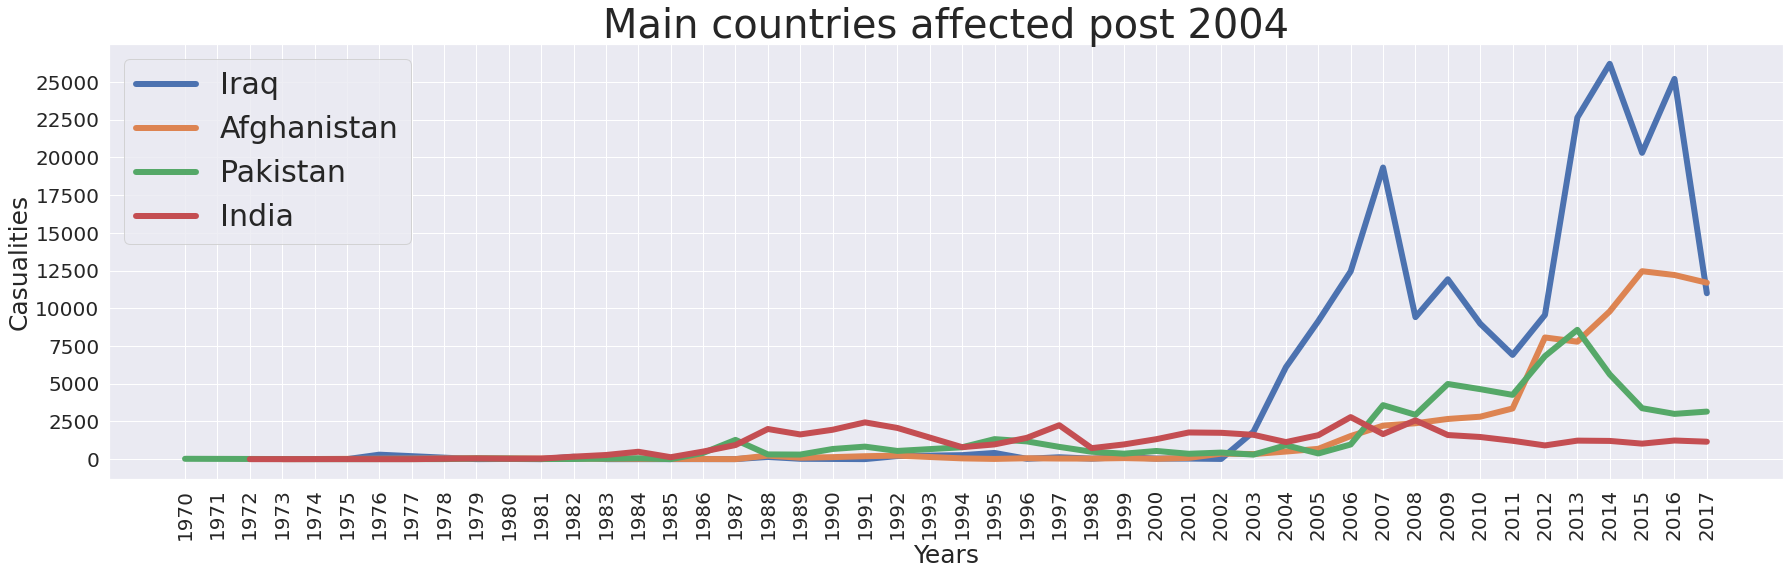

In [41]:
# plotting the Casualities of the 4 countries across years
plt.figure(figsize=(30, 8))
a = sns.lineplot(x='Year',y='Casualities',data=Iraq_data,linewidth = 6,label='Iraq')
a = sns.lineplot(x='Year',y='Casualities',data=Afg_data,linewidth = 6,label='Afghanistan')
a = sns.lineplot(x='Year',y='Casualities',data=Pak_data,linewidth = 6,label='Pakistan')
a = sns.lineplot(x='Year',y='Casualities',data=Ind_data,linewidth = 6,label='India')
sns.set(font_scale = 10)
a.set_xticks(range(1970,2018))
a.set_yticks(range(0,25001,2500))
a.set_xticklabels(a.get_xticks(), size = 20)
a.set_yticklabels(a.get_yticks(), size = 20)
a.set_xlabel("Years", fontsize = 25)
a.set_ylabel("Casualities", fontsize = 25)
plt.title('Main countries affected post 2004',fontsize=40)
plt.xticks(rotation=90)
plt.legend(fontsize=30)
plt.show()

<b>Before 2004 there were very less no.of casualities happened in these countries.<br>
But post 2004 we can observe the sudden rise in it.<br></b>

In [43]:
# sorting out pre and post 2004 data on no of attacks in these countries
pre_2004_df = df[df['Year']<2005].groupby(['Latitude','Longitude']).size().reset_index()
pre_2004_df.columns = ['latitude', 'longitude', 'count_of_attacks']

post_2004_df = df[df['Year']>2004].groupby(['Latitude','Longitude']).size().reset_index()
post_2004_df.columns = ['latitude', 'longitude', 'count_of_attacks']

<Figure size 432x288 with 0 Axes>

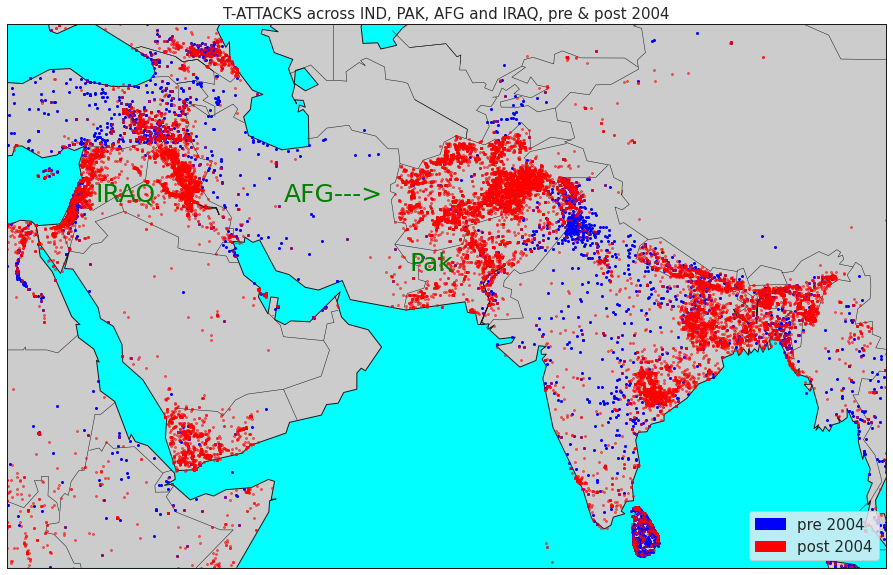

In [59]:
# plotting terrorist activities across AFG,Ind, Pak and IRAQ over the period of 1970 to 2017
#change figure size accordingly
#pd.options.mode.chained_assignment = None

fig=plt.gcf()
fig = plt.figure(figsize=(25,10))
m = Basemap(projection='mill',llcrnrlat=5,urcrnrlat=45,\
            llcrnrlon=30,urcrnrlon=100,resolution='c', lat_ts=20,lat_0=True,lat_1=True)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(lake_color='#00ffff')
m.drawmapboundary(fill_color='#00ffff')


lat_= pre_2004_df['latitude'].tolist()
long_=pre_2004_df['longitude'].tolist()
x_,y_=m(long_,lat_)
m.plot(x_, y_,'go',markersize=2,color = 'blue',alpha=1, label='Pre 2004')

lat_= post_2004_df['latitude'].tolist()
long_= post_2004_df['longitude'].tolist()
x_,y_=m(long_,lat_)
m.plot(x_, y_,'go',markersize=2,color = 'red',alpha=0.5, label='Post 2004')


# plt.title("Terrorist activies across Iraq, AFG and PAK between 1970 to 2017")
plt.legend(loc='lower right',handles=[mpatches.Patch(color='blue',label='pre 2004'), mpatches.Patch(color='red',label='post 2004')], prop={'size':15})
plt.title("T-ATTACKS across IND, PAK, AFG and IRAQ, pre & post 2004",fontsize = 15)

x,y = m(62,28)
plt.text(x,y,'Pak',color='Green',fontsize=25)
x,y = m(52,33)
plt.text(x,y,'AFG--->',color='Green',fontsize=25)
x,y = m(37,33)
plt.text(x,y,'IRAQ',color='Green',fontsize=25)
plt.show()

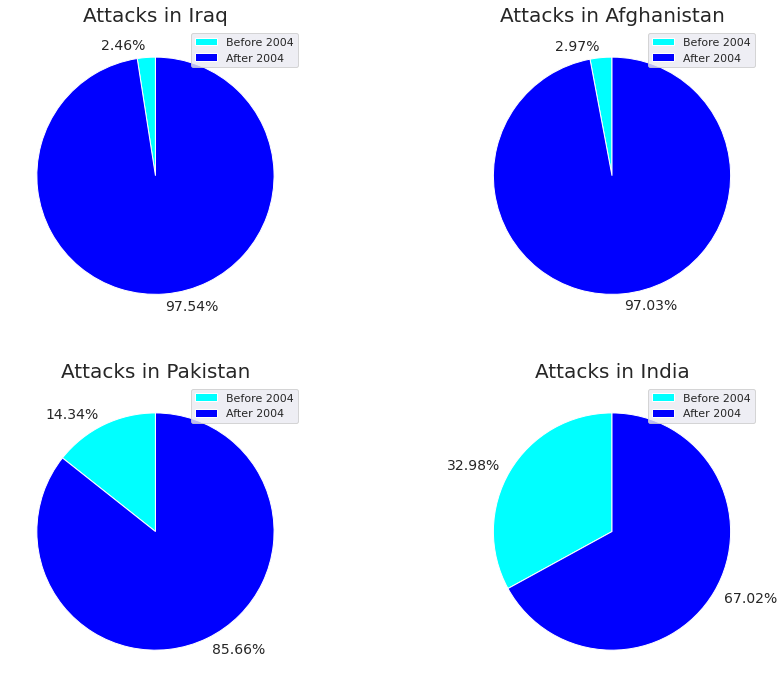

In [60]:
#ratio of the count of attacks for these 4 countries before and after 2004
def country_attacks(country):
    before_attacks = before[before['Country']==country].shape[0]
    after_attacks = after[after['Country']==country].shape[0]
    total_attacks = before_attacks + after_attacks
    return [before_attacks/total_attacks,after_attacks/total_attacks]

plt.figure(figsize=(15, 12))
Iraq_pie = np.array(country_attacks('Iraq'))
Afgh_pie = np.array(country_attacks('Afghanistan'))
Pak_pie = np.array(country_attacks('Pakistan'))
Ind_pie = np.array(country_attacks('India'))
countries = ['Iraq','Afghanistan','Pakistan','India']
pies = [Iraq_pie,Afgh_pie,Pak_pie,Ind_pie]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title('Attacks in ' + countries[i],fontsize = 20)
    plt.pie(pies[i],radius = 1,colors = ['#00FFFF','blue'],labels = [str(round(i*100,2))
            +'%' for i in country_attacks(countries[i])],textprops={'fontsize': 14},startangle = 90)
    plt.legend(['Before 2004','After 2004'],fontsize = 11)
plt.show()

<b>Observation: More than 90% of attcks on these countries are happened after 2004</b>

<b>Exploring the terrorist groups behind the attcaks in these 4 countries<b>

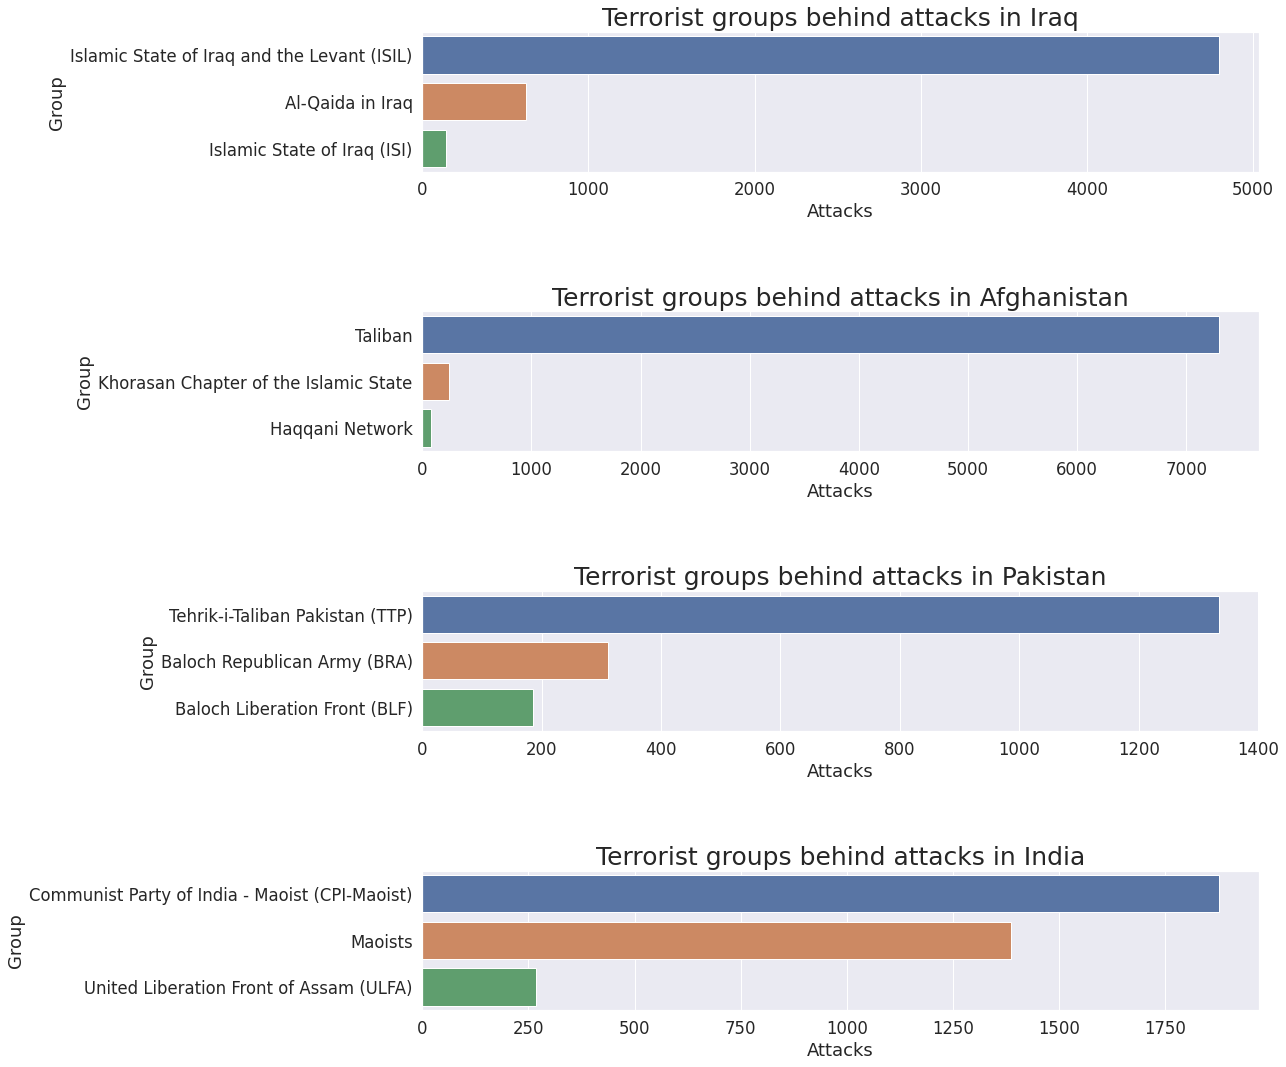

In [61]:
#Finding the main terrorist groups behind these 4 countries
plt.figure(figsize=(15,18))
sns.set(font_scale = 1.5)
for i in range(4):
    plt.subplot(4,1,i+1)
    c = after[(after['Country'] == countries[i]) & (after['Group']!='Unknown')].groupby('Group')['attack_type'].count().reset_index()
    c = c.sort_values(by = 'attack_type',ascending = False)[:3].rename(columns = {'attack_type':'Attacks'})
    b = sns.barplot(data=c,x='Attacks',y='Group')
    plt.title('Terrorist groups behind attacks in '+countries[i],fontsize=25)
plt.subplots_adjust(hspace = 1)
plt.show()

**Initially we analysed the data along multiple parameters, the no of attacks in each country, terrorist activities across the years, the sucess rate of attacks, total casualties incurred across countries, types of attacks spanning across years etc. We also visualized these analysis using different types of plots and graphs.<br> During our analysis, we observed a sudden spike in the no of attacks from 2004 to 2015. Further we explored and analysed the countries and their no of attacks pre and post 2004. Also, we sorted out the terrorist groups that were active in these countries across the years**